### Importante:

El primer paso para poder responder a la pregunta:

¿Cuánto de buenos son los resultados de las métricas de tu modelo? (mae,rmse,...)

Necesitas tener unas métricas con las que poder compararlas. Para ello, debes entrenar el modelo más sencillo (regresión/clasificación) para poder hacerlo. Este modelo se denomina "baseline". Con las métricas de este modelo ya puedes realizar una comparación y saber si el siguiente modelo da mejores o peores resultados.


En los modelos de regresión los errores dicen cuánto se ha equivocado. 

Normalmente trabajamos con el RMSE, viene mejor, ya que si tuviesemos un error de 70000000 el MSE sería hacerlo al cuadrado y con el RMSE podemos trabajar con valores más pequeños.

In [1]:
import numpy as np
import sklearn.metrics as metrics
#importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    # RMSLE es usado cuando la variable targen se ha convertido al logaritmo (por ser su valor muy grande), cuando los valores a predecir son muy grandes, cuando hay que predecir un trillón por ejemplo. 
    
    if (y_true >= 0).all() and (y_pred >= 0).all():  

        mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
        print('mean_squared_log_error: ', round(mean_squared_log_error,4))

    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))  # Si se acerca a 1, habrá aprendido todos los patrones de nuestro modelo.  
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

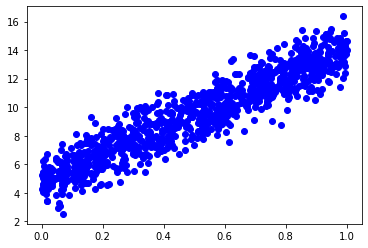

In [2]:
X = np.random.rand(1000, 1) 
X = X.reshape(-1, 1)
y = 5 + 9 * X + np.random.randn(1000, 1)

plt.scatter(X, y, color='b')

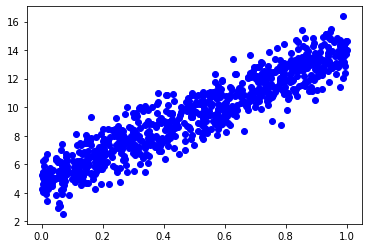

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.scatter(X_train, y_train, color='b')

In [4]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [5]:
y_real = y_train
y_pred = linear_model.predict(X)
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

In [6]:
regression_results(y_true=y_train[:], y_pred=y_pred_train[:])

# La varianza explicativa es lo mismo que r2, si se acerca al cero es que no ha entendido nada de nuestros datos, y si se acerca a 1 quiere decir que ha podido encajar los datos. 
# Que salga 0.86 quiere decir que ha entendido un 86% de los datos y ha podido predecirlos correctamente.
# ¿Cómo sabemos si el MSE y el RMSE es alto? 

mean_squared_log_error:  0.0121
explained_variance:  0.876
r2:  0.876
MAE:  0.8077
MSE:  1.0321
RMSE:  1.0159


In [7]:
regression_results(y_true=y_test, y_pred=y_pred_test)

mean_squared_log_error:  0.0117
explained_variance:  0.8664
r2:  0.8664
MAE:  0.8393
MSE:  1.0568
RMSE:  1.028


In [8]:
regression_results(y_true=y, y_pred=y_pred)

mean_squared_log_error:  0.012
explained_variance:  0.8742
r2:  0.8742
MAE:  0.814
MSE:  1.037
RMSE:  1.0184


In [9]:
linear_model.score(X, y) # En regresión lineal es el r2, siempre que lo ponga en la documentación

0.8741778661612616

C:\Users\xyang\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

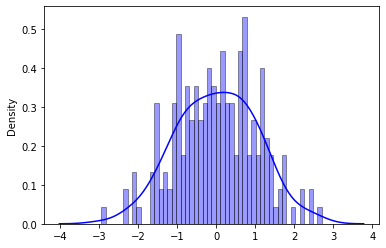

In [10]:
sns.distplot((y_test - y_pred_test), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')



C:\Users\xyang\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

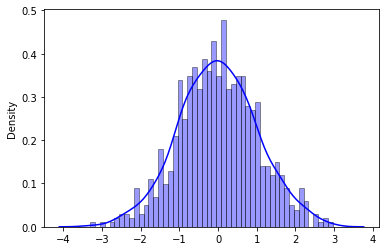

In [11]:
sns.distplot((y_train - y_pred_train), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')



C:\Users\xyang\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

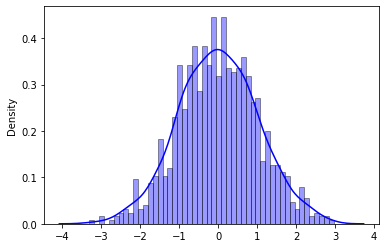

In [12]:
sns.distplot((y - y_pred), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')